# Decision trees

In [15]:
from IPython.display import YouTubeVideo

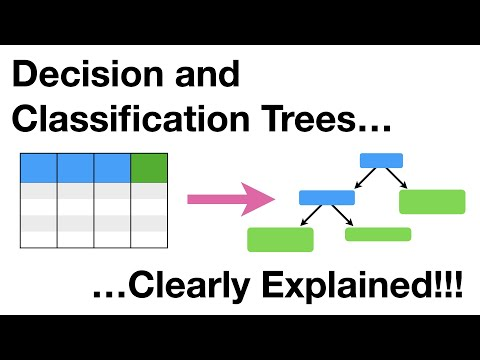

In [16]:
YouTubeVideo('_L39rN6gz7Y')

## Definition and concept of decision trees

Decision trees are popular machine learning algorithms due to their interpretability, simplicity, and ability to handle both categorical and numerical data. 

## Terminology: root node, internal nodes, leaf nodes, branches

Decision trees have different components:
 - Root node: The starting point of the tree.
 - Internal nodes: Represent decisions based on attribute conditions.
 - Leaf nodes: Represent outcomes or class labels.
 - Branches: Connect nodes and represent attribute values or conditions.

![alt text](./blobs_tree_depth_2.png)

## Basic algorithm


1. **Selecting the Best Feature**: The algorithm begins at the root of the tree. It examines all the input features (variables) and selects the one that will best split the dataset into distinct subsets. Different algorithms use different metrics to determine which feature is the "best". The most common metrics are entropy (information gain) for classification tasks and variance reduction for regression tasks, but other methods exists as well, such as **Gini impurity**

2. **Splitting the Data**: Once the best feature is selected, the dataset is split along the values of that feature. This creates branches in the decision tree. 

3. **Recursion**: Steps 1 and 2 are then repeated on each branch (i.e., subset of the data), selecting the best feature and splitting the data. This process is performed recursively, which means that the algorithm repeats these steps within each branch until it reaches a stopping condition.

4. **Stopping Conditions**: The algorithm continues to split the data until a stopping condition is met. There are several possible stopping conditions, such as:
   - All the instances in a subset belong to the same class (for classification tasks).
   - There are no more features left to split upon.
   - The tree has reached a pre-set maximum depth (to avoid overfitting).
   - The number of instances in a leaf node is less than a pre-set minimum (to avoid creating rules for very small groups, which can also lead to overfitting).

5. **Pruning**: After the decision tree is built, it might be "pruned" to avoid overfitting. Pruning involves removing branches that add little to no predictive power. This can be done by setting a minimum threshold of reduction in the metric (entropy or variance), and if a split doesn't reduce the metric by that amount, the split is not made, and the node is treated as a leaf node.

6. **Prediction**: Once the tree is built (and possibly pruned), it can be used to make predictions on new data instances. Starting from the root, the algorithm checks the feature that was chosen for the first split and moves down the branch corresponding to the value of that feature in the new instance. It continues to do this until it reaches a leaf node, at which point the prediction is made.


## Spliting metrics

Decision tree algorithms often employ different metrics to determine the best feature for splitting. These metrics help quantify the improvement brought about by a particular split. Here are the most popular ones:

1. **Information Gain**:  It's based on the concept of entropy in information theory, which quantifies the purity of an input set. The feature with the highest information gain is chosen for the split. This is the metric used in the ID3, C4.5, and C5.0 tree algorithms.

2. **Gini Impurity**: The Gini impurity is a measure of misclassification, which quantifies the probability of incorrectly classifying a randomly chosen element in the dataset. Like Information Gain, the goal is to choose the feature that reduces the Gini impurity the most. This is used in the CART (Classification and Regression Trees) algorithm.

3. **Variance Reduction**: This is used for regression trees (CART for regression tasks). The variance is a measure of the dispersion of data points. The aim is to partition the data in a way that minimizes the variance of the target variable in each leaf node. The feature that leads to the highest reduction in variance is selected for the split.

4. **Gain Ratio**: This is an extension of the Information Gain that is used in the C4.5 algorithm. It introduces a normalization factor to the Information Gain, which reduces its bias towards features with many outcomes. It adjusts the information gain by the split info, which accounts for the number and size of branches when a field is split. 

5. **Chi-Square**: It's used in the CHAID (Chi-squared Automatic Interaction Detection) algorithm. It measures the statistical significance of the difference between the distributions of the target variable in the child nodes. The higher the Chi-square value, the greater the difference in distributions, and hence the more significant the feature for the split.

6. **Distance to Mean**: This is used for regression trees. It measures how much each value differs from the mean. The goal is to make a split that minimizes this value. It's not used as often as variance reduction for regression trees, but you might still see it in some cases.

Each of these metrics has its strengths and weaknesses, and may work better for different types of data and different problems.

### Example: Gini impurity

**Definition**

Gini Impurity is a metric used while creating decision trees in the CART (Classification and Regression Trees) algorithm. It's a measure of impurity, misclassification, or error, used for deciding the best feature to split the data on at each step in the tree.

Mathematically, the Gini Impurity of a node is defined as:

```
Gini(D) = 1 - Σ (p_j)^2
```

where `D` is the dataset in the node, `p_j` is the relative frequency of class `j` in `D`, and the summation Σ is over all classes.

**Intuition**

The Gini impurity is a probability measure that quantifies the "purity" of a node or set in terms of how mixed the classes are. The output of Gini Impurity lies between 0 and 1, where:

- 0 denotes that all elements in a node belong to a single class, i.e., the node is pure.
- 1 denotes that the elements are randomly distributed across various classes, i.e., the node is impure.

In other words, Gini impurity measures the degree or probability of a particular element being wrongly classified when it's randomly picked.

**Examples**

Let's go through some examples to understand how Gini Impurity works:

1. **Example 1**: Let's assume we have a node with 100 instances, 50 of class A and 50 of class B. The Gini Impurity for this node will be:

```
Gini(D) = 1 - [(50/100)^2 + (50/100)^2]
        = 1 - [0.25 + 0.25]
        = 1 - 0.5
        = 0.5
```
This is the highest possible impurity, which makes sense because we have an equal number of instances from both classes.

2. **Example 2**: Now, let's assume we have another node with 100 instances, 90 of class A and 10 of class B. The Gini Impurity for this node will be:

```
Gini(D) = 1 - [(90/100)^2 + (10/100)^2]
        = 1 - [0.81 + 0.01]
        = 1 - 0.82
        = 0.18
```

The impurity has decreased because the node is now more skewed towards class A. The lower the Gini Impurity, the lower the probability of misclassifying a randomly chosen element from this node.


**Example**: Suppose we have a node with 50 instances, all of which belong to Class A. The Gini impurity for this node would be:

```
Gini(D) = 1 - [(50/50)^2]
        = 1 - [1^2]
        = 1 - 1
        = 0
```

As you can see, when all instances in the node belong to the same class (in this case, Class A), the Gini impurity is 0. This means the node is "pure" because there is no mixture of classes. If we randomly pick an instance from this node, there is a 0% chance that it will be misclassified, hence the impurity score is 0.


In a decision tree, the best split is the one that decreases the Gini Impurity the most from the parent node to the child nodes. This process continues recursively until the tree reaches a stopping condition (such as a maximum depth or a minimum number of instances per node).

## Code section

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets

## Loading the Iris dataset

In [4]:
X, y = datasets.load_iris(as_frame=True, return_X_y=True)

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Fitting a Decision tree model

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=5)
model.fit(X,y)

DecisionTreeClassifier(min_samples_leaf=5)

In [18]:
model.score(X, y)

0.9733333333333334

## Visualisze a classifier

In [8]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Visualizing the tree

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'naive_tree.dot', feature_names = X.columns)

In [22]:
!dot -Tpng naive_tree.dot -o naive_tree.png

![alt text](./naive_tree.png)

![alt text](./naive_tree.png)

## Example on blobs

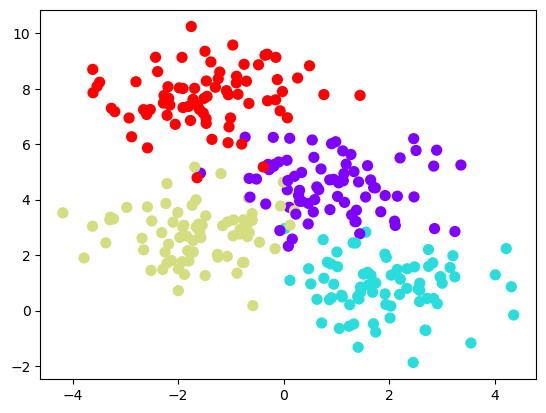

In [23]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

### Depth 1

In [24]:
from sklearn.tree import DecisionTreeClassifier
depth_1_tree = DecisionTreeClassifier(max_depth=1).fit(X, y)

In [25]:
export_graphviz(depth_1_tree, 'blobs_tree_depth_1.dot', feature_names = ['F_1', 'F_2'])

In [26]:
!dot -Tpng blobs_tree_depth_1.dot -o blobs_tree_depth_1.png

![alt text](./blobs_tree_depth_1.png)

/var/folders/kw/b4wf7zwd5jlbkn6jf39kwm4m0000gn/T/ipykernel_31699/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


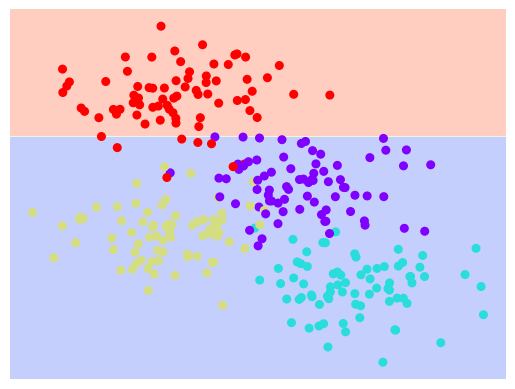

In [27]:
visualize_classifier(depth_1_tree, X, y)

### Depth 2

In [29]:
from sklearn.tree import DecisionTreeClassifier
depth_2_tree = DecisionTreeClassifier(max_depth=2).fit(X, y)

In [30]:
export_graphviz(depth_2_tree, 'blobs_tree_depth_2.dot', feature_names = ['F_1', 'F_2'])

In [31]:
!dot -Tpng blobs_tree_depth_2.dot -o blobs_tree_depth_2.png

![alt text](./blobs_tree_depth_2.png)

/var/folders/kw/b4wf7zwd5jlbkn6jf39kwm4m0000gn/T/ipykernel_31699/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


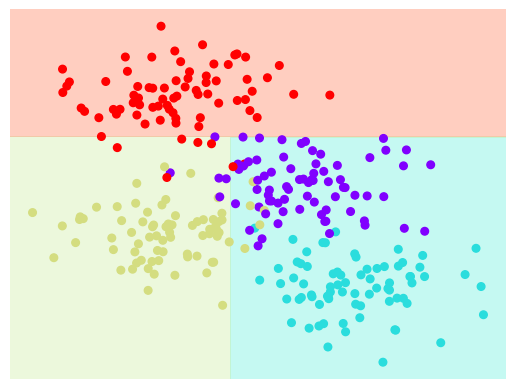

In [32]:
visualize_classifier(depth_2_tree, X, y)

## Decision trees 